#Assessment 2


Name : Iqbal Saviola Syah B

NIM : 1301190318

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/iqbalsaviola/assessmentIoT/main/Assesment%202/LinearAccelerometer.csv")
df.head()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.012454,0.645200,-0.688699,-0.808852
1,0.022432,0.793549,-0.784000,-0.997737
2,0.032411,0.684318,-0.788398,-1.010941
3,0.042390,0.408542,-0.725502,-0.906115
4,0.052368,0.014330,-0.616234,-0.709040


In [14]:
# Drop dataframe, karena ukuran rentang frequency terlalu kecil, sehingga butuh untuk di drop sebagian
df = df[4500:7000]
df

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
4500,44.916025,0.002708,0.003147,0.030138
4501,44.926004,0.004666,0.005161,0.044058
4502,44.935982,0.002089,0.003213,0.043011
4503,44.945961,0.003636,0.007321,0.042116
4504,44.955939,0.000931,0.010425,0.037630
...,...,...,...,...
6995,69.812666,0.004484,0.007388,0.036145
6996,69.822645,-0.001470,0.000918,0.045429
6997,69.832624,0.003355,0.001482,0.038247
6998,69.842602,0.006582,0.004616,0.040191


In [15]:
# Menyederhanakan column dataframe ke variable
stuff = df.to_numpy()
t, ax, ay, az = stuff.T

#az=az-(sum(az)/np.size(az,1))
#ay=ay-(sum(ay)/np.size(ay,1))
#ax=ax-(sum(ax)/np.size(ax,1))

print(az[4])

0.03762975633


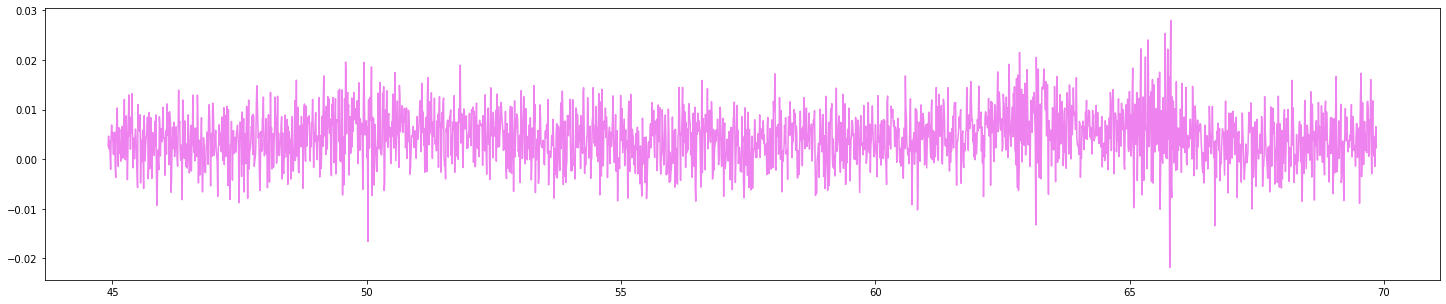

In [16]:
#plot sumbu x
plt.figure(figsize=(25,5))
plt.plot(t, ax, label = "ax", color = "violet")
plt.show()


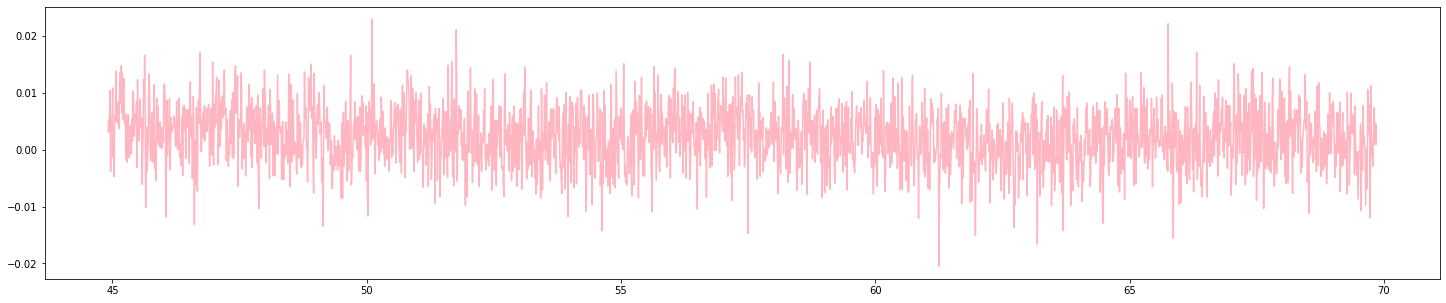

In [17]:
#plot sumbu y
plt.figure(figsize=(25,5))
plt.plot(t, ay, label = "ay", color = "lightpink")
plt.show()

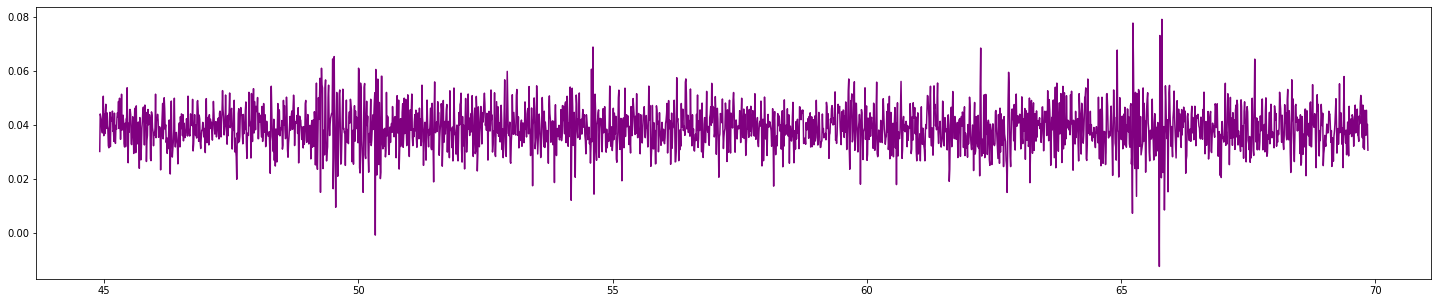

In [18]:
#plot sumbu z
plt.figure(figsize=(25,5))
plt.plot(t, az, label = "az", color = "purple")
plt.show()

**1.(Score maksimal 40 poin). Buatlah aplikasi untuk membaca rekaman data linear accelerometer. Dengan aplikasi tersebut buatlah plot sinyal masing-masing sumbu accelerometer.**

**A.  Lampirkan hasil plot anda dalam jawaban, dan beri penjelasan secara umum dari hasil perekaman anda.**

Data diambil pada lokasi persipangan rel kereta, dimana kendaraan banyak lewat dan menurukan kecepatan, variasi kendaraan mulai dari mobil dan motor melewati jalan. Hasil mengambilan data menggunakan phyphox, didapat pada plot dibawah.

Pada gambar diatas didapat bahwa, perbedaan frekuensi tidak terlalu banyak, hal ini dikarenakan kendaraan tidak melaju cukup kuat, dikarenakan melewati persimpangan rel kereta. Pada plot diatas juga ditampilkan plot diantara 45 sampai 70 second, hal ini untuk membersikan noise getaran tangan yang ada di awal dan akhir perekaman phyphox.

**B. Lampirkan juga program anda untuk membaca data dan memplot data serta beri penjelasan dari program anda secara umum. Beri penjelasan secara komprehensif**

Lampiran program ada di lembar akhir.

**C. Berdasarkan hasil plotting anda, sumbu accelerometer manakah yang dominan saat terdapat kendaraan lewat? Beri penjelasan secara komprehensif.**

Secara keseluruhan semua sumbu accelerometer dibutuhkan untuk mengidentifikasi kendaraan yang lewat. Dapat dilihat, sumbu ay lebih sensitif terhadap getaran, tetapi tidak cukup sensitif untuk mendeteksi kendaraan yang lewat. Sedangkan sumbu ax dan az cukup dominan untuk mengidentifikasi kendaraan yang lewat



In [26]:
f1 = np.fft.fft(az)/len(az) 
f1 = f1[range(int(len(az)/2))] # Exclude sampling frequency


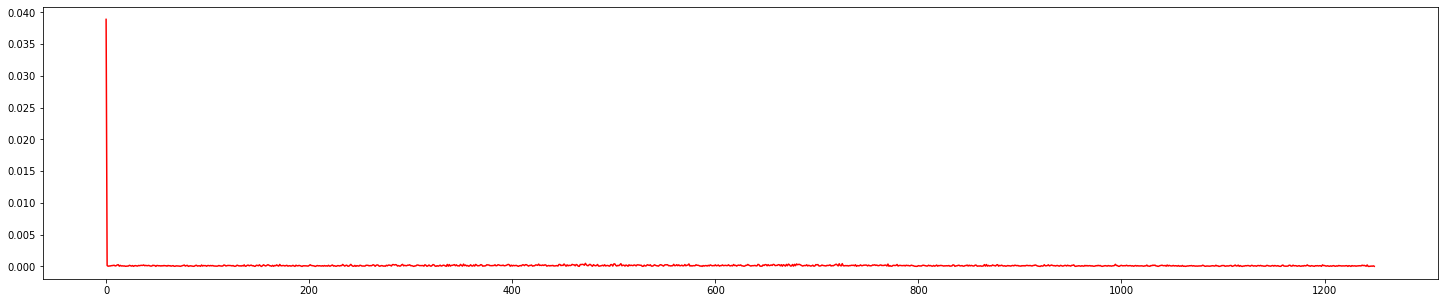

In [27]:
plt.figure(figsize=(25,5))
plt.plot(np.abs(f1), color = 'red')
plt.show()

In [28]:
f1baru = f1[450:700]
f1baru

array([ 7.01537294e-05+1.35369118e-04j,  9.80762310e-05-3.70239167e-04j,
       -2.00179689e-04-1.57586379e-05j,  3.52217284e-05+2.24984606e-05j,
       -9.70806078e-05+2.30533871e-04j, -4.19550240e-05-8.93807625e-05j,
        8.23795373e-05-1.73787667e-04j, -8.54479901e-05-1.05654321e-04j,
        1.21777806e-04-1.32714593e-04j,  1.63645307e-04+2.82557174e-04j,
       -1.53105705e-04+2.02368284e-04j,  2.46908326e-04-7.38228909e-05j,
        5.81882157e-05-8.30993768e-05j, -3.00341229e-04+7.09559802e-05j,
        2.15533560e-04+9.05731000e-05j,  3.37324665e-05+2.74629221e-05j,
        2.32131326e-05-1.00011449e-05j, -2.97429716e-04-7.66662936e-05j,
        1.38841101e-04-2.61332130e-04j,  1.99121807e-04-2.68830290e-04j,
        3.00037349e-04-4.92545873e-05j,  1.74093831e-04+7.49271616e-05j,
       -3.25801668e-04+3.69708114e-04j, -1.65157155e-04-2.02452143e-04j,
        1.20513759e-04-3.77077568e-05j, -1.59380435e-05+1.34571652e-04j,
        2.94576800e-04+1.08805863e-04j, -1.34677956

In [29]:
print(len(f1baru))

250


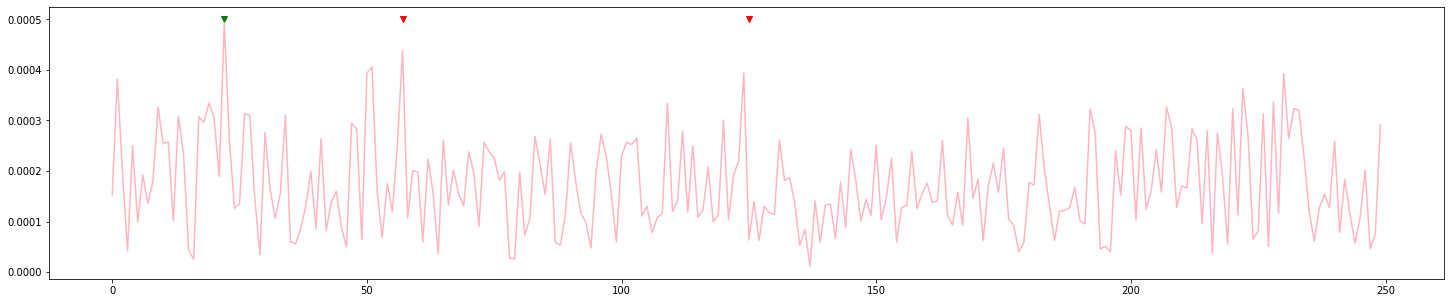

In [44]:
plt.figure(figsize=(25,5))
plt.plot(np.abs(f1baru), color = 'lightpink')
plt.scatter(22,0.0005, color = 'green', marker = 'v', alpha = 1)
plt.scatter(57,0.0005, color = 'red', marker = 'v', alpha = 1)
plt.scatter(124,0.0005, color = 'red', marker = 'v', alpha = 1)
plt.show()

**2.(Score maksimal 60 poin) Pada bagian ini anda akan melakukan analisis data accelerometer serta signal filtering untuk membuang noise yang tidak diperlukan berdasarkan sumbu accelerometer yang dominan dalam mendeteksi getaran jalan saat kendaraan lewat**

**A. Ubahlah domain sumbu x dalam plot anda kedalam domain waktu (bukan index data) dengan cara melakukan proses FFT terhadap sinyal accelerometer yang anda dapatkan. Buatlah plot dari hasil FFT anda, serta jelaskan hasil dari FFT anda ( misalnya jika tidak ada kendaraan lewat, spt apa frekuensi yg dihasilkan dalam doman FFT, jika ada truk lewat spt apa, dst.)**


Pada plot ftt, hasil yang didapat cukup berbeda dengan data raw, dimana domain sumbu berubah menjadi domain waktu. Plot dapat dilihat seperti gambar dibawah.


Seperti gambar diatas, dapat dilihat bahwa terdapat beberapa waktu dimana frekuensi mencapai titik nilai 5 dan 4, yang dimana cukup kuat dibandingkan frekuensi yang lainnya. Hal ini menandakan bahwa terdapat kendaraan yang lewat pada waktu tersebut, sehingga sensor mendeteksi frekuensi yang lebih tinggi


**B. Lampirkan serta jelaskan algoritma beserta kode program dari FFT yang anda gunakan !**

Lampiran program ada di lembar akhir.

**C. Pada bagian ini anda akan melakukan analisis berdasarkan proses FFT untuk mengetahui frekuensi harmonik berdasarkan getaran tiap jenis kendaraan.**

	i. Berdasarkan plot data accelerometer, bedakan dengan cara memberi tanda secara manual, di saat kapan kendaraan kecil lewat, atau kendaraan sedang dan besar lewat. 



Dapat dilihat pada plot diatas, terdapat tanda pada plot tersebut. Tanda hijau digunakan untuk menandakana kendataan sedang lewat, seperti mobil. hal ini dibuktikan dengan frekuensi yang cukup tinggi daripada frekuensi yang lainnya hingga mencapai nilai 5.  Sedangkan tanda merah digunakan untuk menandakan kendaraan kecil lewat, seperti motor. hal ini dibuktikan dengan frekuensi yang cukup tinggi daripada frekuensi yang lainnya hingga mencapai nilai 4.  

	ii. Berdasarkan hasil FFT, kira-kira range frequency berapa yang dihasilkan dari getaran akibat kendaraan yang lewat (untuk setiap jenis kendaraan akan menghasilkan frekuensi berbeda).

Range frekuensi mobil mencapai 50 - 40 Hz.
Range frekuensi mobil mencapai 40-30  Hz.
